# Speed Chart

# Throughput

In [1]:
#  On a mac: brew install graphviz
from graphviz import Digraph

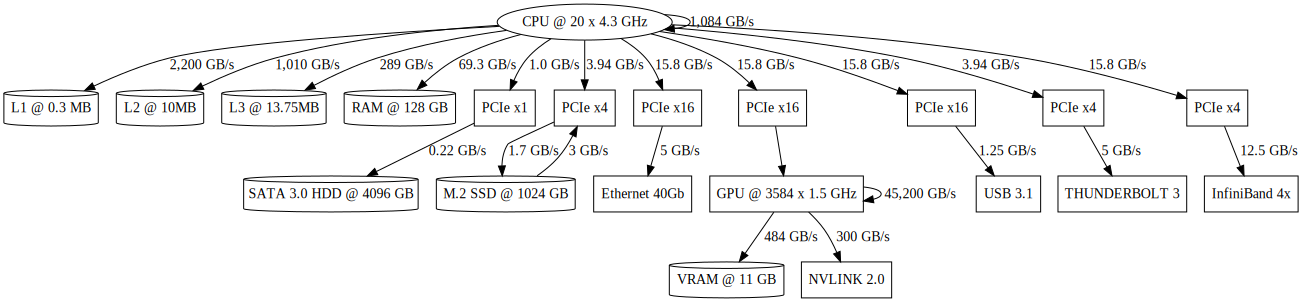

In [2]:
# graphviz python package docs: https://graphviz.readthedocs.io/en/stable/
dot = Digraph(comment='Throughput')

# interesting realworld numbers: https://asteroidsathome.net/boinc/cpu_list.php
# http://www.sisoftware.eu/2017/06/23/intel-core-i9-skl-x-review-and-benchmarks-cpu-avx512-is-here/
# https://en.wikipedia.org/wiki/List_of_Intel_Core_i9_microprocessors
# Intel i9 7900X - FP32 @ 271 GFLOPS, multiply by four => 1084 GB/s
dot.node('CPU', 'CPU @ 20 x 4.3 GHz')
dot.edge('CPU', 'CPU', label='1,084 GB/s')

# http://www.sisoftware.eu/2017/06/24/intel-core-i9-skl-x-review-and-benchmarks-cache-memory-performance/
dot.attr('node', shape='cylinder')
dot.node('L1', 'L1 @ 0.3 MB') # @ 320 kB I + 320 kB D
dot.edge('CPU', 'L1', label='2,200 GB/s')
dot.node('L2', 'L2 @ 10MB') # @ 10MB  (10 * 1024 KiB) 
dot.edge('CPU', 'L2', label='1,010 GB/s')
dot.node('L3', 'L3 @ 13.75MB') #  @ 13.75MB
dot.edge('CPU', 'L3', label=' 289 GB/s')
dot.attr('node', shape='rect')

dot.attr('node', shape='cylinder')
dot.node('RAM', 'RAM @ 128 GB')
dot.attr('node', shape='rect')
dot.edge('CPU', 'RAM', label='69.3 GB/s')


# https://en.wikipedia.org/wiki/PCI_Express
dot.attr('node', shape='rect')
dot.node('PCIe0', 'PCIe x1')
dot.node('PCIe1', 'PCIe x4')
dot.node('PCIe2', 'PCIe x16')
dot.node('PCIe3', 'PCIe x16')
dot.node('PCIe4', 'PCIe x16')
dot.node('PCIe5', 'PCIe x4')
dot.node('PCIe6', 'PCIe x4')
dot.attr('node', shape='oval')

dot.edge('CPU', 'PCIe0', label=' 1.0 GB/s')
dot.edge('CPU', 'PCIe1', label=' 3.94 GB/s')
dot.edge('CPU', 'PCIe2', label='15.8 GB/s')
dot.edge('CPU', 'PCIe3', label='15.8 GB/s')
dot.edge('CPU', 'PCIe4', label='15.8 GB/s')
dot.edge('CPU', 'PCIe5', label=' 3.94 GB/s')
dot.edge('CPU', 'PCIe6', label='15.8 GB/s')

dot.attr('node', shape='cylinder')
dot.node('SATA', 'SATA 3.0 HDD @ 4096 GB')
dot.attr('node', shape='rect')
# https://www.newegg.com/Product/Product.aspx?Item=N82E16822179129
dot.edge('PCIe0', 'SATA', label='0.22 GB/s')

# Samsung 1TB PM961 Single Sided 80mm (2280/2280SS) M.2 PCI Express 3.0 x4 (PCIe Gen3 x4) OEM NVMe SSD - MZVLW1T0HMLH
dot.attr('node', shape='cylinder')
dot.node('NVMe', 'M.2 SSD @ 1024 GB')
dot.attr('node', shape='rect')
# note read = 3,000 GB/s
dot.edge('PCIe1', 'NVMe', label='1.7 GB/s')
dot.edge('NVMe', 'PCIe1', label='3 GB/s')

# (Mellanox MHQH19B-XTR)
dot.node('ETH1', 'Ethernet 40Gb')
dot.edge('PCIe2', 'ETH1', label='  5 GB/s')

# InfiniBand
# https://en.wikipedia.org/wiki/InfiniBand
# http://www.colfaxdirect.com/store/pc/viewPrd.asp?idproduct=2839
dot.node('IB1', 'InfiniBand 4x')
dot.edge('PCIe6', 'IB1', label='  12.5 GB/s')


# 11.3 TFLOPs multiply by four to get bytes per second => 45.2 TB/s 
dot.node('GPU1', 'GPU @ 3584 x 1.5 GHz')
dot.edge('GPU1', 'GPU1', label='  45,200 GB/s')
dot.attr('node', shape='cylinder')
dot.node('VRAM', 'VRAM @ 11 GB') # (GDDR5X)
dot.attr('node', shape='rect')
dot.edge('PCIe3', 'GPU1')
dot.edge('GPU1', 'VRAM', label='  484 GB/s')

# NVLink
# https://en.wikipedia.org/wiki/NVLink
dot.node('NVLINK1', 'NVLINK 2.0')
dot.edge('GPU1', 'NVLINK1', label='  300 GB/s')


# USB
dot.attr('node', shape='rect')
dot.node('USB', 'USB 3.1') # gen 2
dot.edge('PCIe4', 'USB', label='1.25 GB/s')
dot.attr('node', shape='oval')

#dot.attr('edge', penwidth='5')
# https://en.wikipedia.org/wiki/Thunderbolt_(interface)#Thunderbolt_3
# https://www.asus.com/us/Motherboard-Accessory/ThunderboltEX-3/
# https://arstechnica.com/gadgets/2017/08/laptop-external-graphics-card-review/
dot.attr('node', shape='rect')
dot.node('TB', 'THUNDERBOLT 3')
dot.edge('PCIe5', 'TB', label='5 GB/s')
dot.attr('node', shape='oval')

dot